In [1]:
import os

import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
%%time
folder = 'assets/'
title_filename = 'title.basics.tsv.gz'
if os.path.exists(folder + title_filename):
    films = pd.read_csv(folder + title_filename, sep='\t', na_values=['\\N'])
else:
    print(f'{title_filename} does not exist, using url to get data')
    films = pd.read_csv(f'https://datasets.imdbws.com/{title_filename}', sep='\t', na_values=['\\N'])
    
print(f'{films.shape=}')

rating_filename = 'title.ratings.tsv.gz'
if os.path.exists(folder + rating_filename):
    ratings = pd.read_csv(folder + rating_filename, sep='\t', na_values=['\\N'])
else:
    print(f'{rating_filename} does not exist, using url to get data')
    ratings = pd.read_csv(f'https://datasets.imdbws.com/{rating_filename}', sep='\t', na_values=['\\N'])
    
print(f'{ratings.shape=}')

# будем рассматривать только фильмы с оценками
films = pd.merge(films, ratings, on='tconst', how='inner')

crew_filename = 'title.crew.tsv.gz'
if os.path.exists(folder + crew_filename):
    crew = pd.read_csv(folder + crew_filename, sep='\t', na_values=['\\N'])
else:
    print(f'{crew_filename} does not exist, using url to get data')
    crew = pd.read_csv(f'https://datasets.imdbws.com/{crew_filename}', sep='\t', na_values=['\\N'])
    
print(f'{crew.shape=}')

names_filename = 'name.basics.tsv.gz'
if os.path.exists(folder + names_filename):
    names = pd.read_csv(folder + names_filename, sep='\t', na_values=['\\N'])
else:
    print(f'{names_filename} does not exist, using url to get data')
    names = pd.read_csv(f'https://datasets.imdbws.com/{names_filename}', sep='\t', na_values=['\\N'])

print(f'{names.shape=}')


title.basics.tsv.gz does not exist, using url to get data


<timed exec>:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.


films.shape=(11420272, 9)
title.ratings.tsv.gz does not exist, using url to get data
ratings.shape=(1529598, 3)
title.crew.tsv.gz does not exist, using url to get data
crew.shape=(11420272, 3)
name.basics.tsv.gz does not exist, using url to get data
names.shape=(14145244, 6)
CPU times: total: 10.6 s
Wall time: 56.7 s


In [3]:
films.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0.0,1894.0,NaN,1.0,"Documentary,Short",5.7,2118
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892.0,NaN,5.0,"Animation,Short",5.6,286
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0.0,1892.0,NaN,5.0,"Animation,Comedy,Romance",6.4,2160
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892.0,NaN,12.0,"Animation,Short",5.3,183
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,NaN,1.0,Short,6.2,2886


<Axes: >

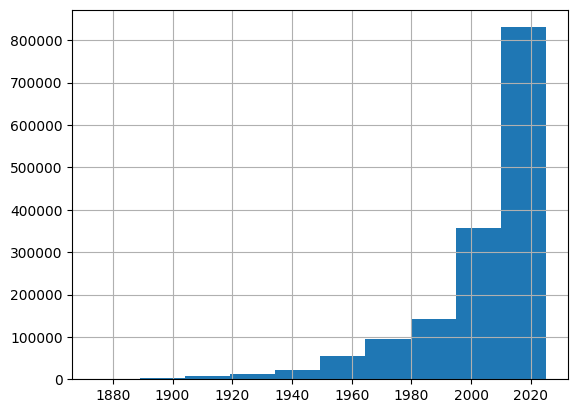

In [4]:
films.startYear.hist()

### ограничивания датасет выборкой из 10^5 фильмов, чтобы выполнять команды было не долго
Когда станет понятно, что нужно посчитать, надо будет на полном датасете считать

In [5]:
# df = films.sample(100000)
df = films.copy()
df.shape

(1526784, 11)

In [6]:
df = pd.merge(df, crew, how='left', on='tconst')
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers
0,tt0000001,short,Carmencita,Carmencita,0.0,1894.0,NaN,1.0,"Documentary,Short",5.7,2118,nm0005690,NaN
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892.0,NaN,5.0,"Animation,Short",5.6,286,nm0721526,NaN
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0.0,1892.0,NaN,5.0,"Animation,Comedy,Romance",6.4,2160,nm0721526,NaN
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892.0,NaN,12.0,"Animation,Short",5.3,183,nm0721526,NaN
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,NaN,1.0,Short,6.2,2886,nm0005690,NaN


In [7]:
# у фильма может быть несколько режиссеров
# строка с запятыми будет преобразована в список строк
df.directors = df.directors.apply(lambda x: x.split(',') if not pd.isna(x) else np.nan)
df.writers = df.writers.apply(lambda x: x.split(',') if not pd.isna(x) else np.nan)

df['number_of_directors'] = df.directors.apply(lambda x: len(x) if not np.all(pd.isna(x)) else np.nan)

# у фильма может быть несколько жанров (до трех)
# строка с запятыми будет преобразована в список строк
# main_genre это первый жанр
df['genres_lst'] = df.genres.apply(lambda x: 
                                   x.split(',') if not pd.isna(x) else np.nan)

df['main_genre'] = df.genres_lst.apply(lambda x: 
                                       x[0] if not np.all(pd.isna(x)) else np.nan)

df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers,number_of_directors,genres_lst,main_genre
0,tt0000001,short,Carmencita,Carmencita,0.0,1894.0,NaN,1.0,"Documentary,Short",5.7,2118,[nm0005690],NaN,1.0,"[Documentary, Short]",Documentary
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892.0,NaN,5.0,"Animation,Short",5.6,286,[nm0721526],NaN,1.0,"[Animation, Short]",Animation
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0.0,1892.0,NaN,5.0,"Animation,Comedy,Romance",6.4,2160,[nm0721526],NaN,1.0,"[Animation, Comedy, Romance]",Animation
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892.0,NaN,12.0,"Animation,Short",5.3,183,[nm0721526],NaN,1.0,"[Animation, Short]",Animation
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,NaN,1.0,Short,6.2,2886,[nm0005690],NaN,1.0,[Short],Short


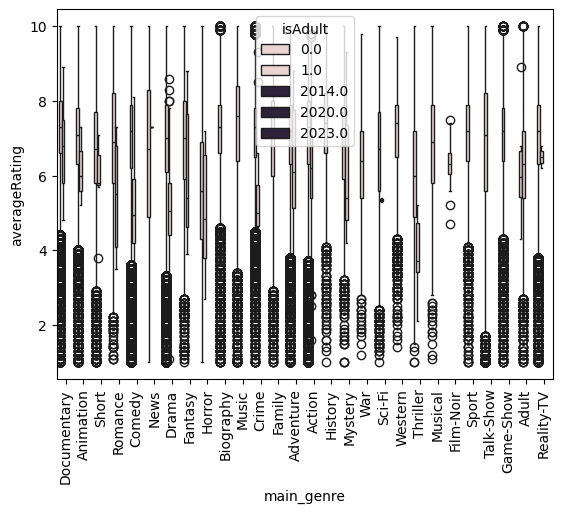

In [8]:
sns.boxplot(df, x='main_genre', y='averageRating', hue='isAdult')
plt.xticks(rotation=90);

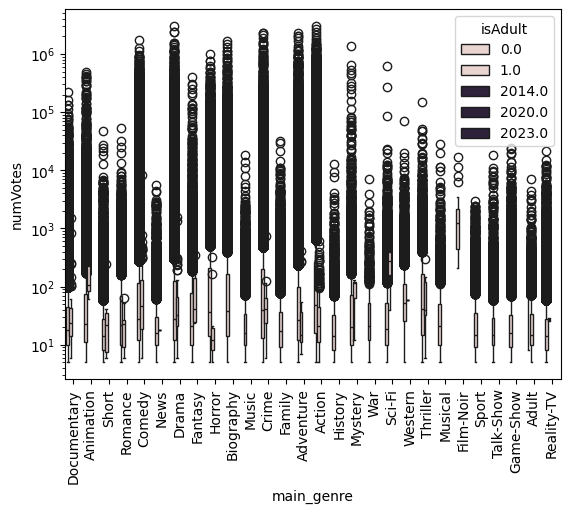

In [11]:
sns.boxplot(df, x='main_genre', y='numVotes', hue='isAdult')
plt.xticks(rotation=90);
plt.yscale('log')

In [12]:
# пусть в каждой строке будет указан только один режиссер
# тогда фильму с двумя режиссерами, будет соответствовать две строки
exploded = df.explode('directors')
print(f'{exploded.shape=}')
exploded.head()

exploded.shape=(1973461, 16)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers,number_of_directors,genres_lst,main_genre
0,tt0000001,short,Carmencita,Carmencita,0.0,1894.0,NaN,1.0,"Documentary,Short",5.7,2118,nm0005690,NaN,1.0,"[Documentary, Short]",Documentary
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892.0,NaN,5.0,"Animation,Short",5.6,286,nm0721526,NaN,1.0,"[Animation, Short]",Animation
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0.0,1892.0,NaN,5.0,"Animation,Comedy,Romance",6.4,2160,nm0721526,NaN,1.0,"[Animation, Comedy, Romance]",Animation
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892.0,NaN,12.0,"Animation,Short",5.3,183,nm0721526,NaN,1.0,"[Animation, Short]",Animation
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,NaN,1.0,Short,6.2,2886,nm0005690,NaN,1.0,[Short],Short


In [13]:
# добавляется информация о человеке
films_with_directors = pd.merge(exploded, names, how='left', 
                                left_on=['directors'], right_on=['nconst'])
print(f'{films_with_directors.shape=}')
films_with_directors.head()

films_with_directors.shape=(1973461, 22)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers,number_of_directors,genres_lst,main_genre,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,tt0000001,short,Carmencita,Carmencita,0.0,1894.0,NaN,1.0,"Documentary,Short",5.7,2118,nm0005690,NaN,1.0,"[Documentary, Short]",Documentary,nm0005690,William K.L. Dickson,1860.0,1935.0,"cinematographer,director,producer","tt1428455,tt1496763,tt0308254,tt0219560"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892.0,NaN,5.0,"Animation,Short",5.6,286,nm0721526,NaN,1.0,"[Animation, Short]",Animation,nm0721526,Émile Reynaud,1844.0,1918.0,"director,animation_department,producer","tt32169968,tt0000003,tt16763740,tt16763674"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0.0,1892.0,NaN,5.0,"Animation,Comedy,Romance",6.4,2160,nm0721526,NaN,1.0,"[Animation, Comedy, Romance]",Animation,nm0721526,Émile Reynaud,1844.0,1918.0,"director,animation_department,producer","tt32169968,tt0000003,tt16763740,tt16763674"
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892.0,NaN,12.0,"Animation,Short",5.3,183,nm0721526,NaN,1.0,"[Animation, Short]",Animation,nm0721526,Émile Reynaud,1844.0,1918.0,"director,animation_department,producer","tt32169968,tt0000003,tt16763740,tt16763674"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,NaN,1.0,Short,6.2,2886,nm0005690,NaN,1.0,[Short],Short,nm0005690,William K.L. Dickson,1860.0,1935.0,"cinematographer,director,producer","tt1428455,tt1496763,tt0308254,tt0219560"


In [15]:
# сколько режиссеров сняли по какому количеству фильмов
# индекс это количество фильмов
# directors это сколько режиссеров сняли такое количество фильмов
films_with_directors.groupby('directors').averageRating.count().reset_index().groupby('averageRating').count()

,directors
averageRating,
1,168949
2,48342
3,22863
4,13635
5,8915
...,...
1064,1
1223,1
1228,1


In [16]:
films_with_directors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973461 entries, 0 to 1973460
Data columns (total 22 columns):
 #   Column               Dtype  
---  ------               -----  
 0   tconst               object 
 1   titleType            object 
 2   primaryTitle         object 
 3   originalTitle        object 
 4   isAdult              float64
 5   startYear            float64
 6   endYear              float64
 7   runtimeMinutes       object 
 8   genres               object 
 9   averageRating        float64
 10  numVotes             int64  
 11  directors            object 
 12  writers              object 
 13  number_of_directors  float64
 14  genres_lst           object 
 15  main_genre           object 
 16  nconst               object 
 17  primaryName          object 
 18  birthYear            float64
 19  deathYear            float64
 20  primaryProfession    object 
 21  knownForTitles       object 
dtypes: float64(7), int64(1), object(14)
memory usage: 331.2+ MB


нулевых значений в поле `genres` не очень много, можно было бы их и удалить

In [ ]:
# может быть жанр фильма закодировать?
pd.get_dummies(films_with_directors.main_genre)

In [ ]:
films_with_directors.head()

In [17]:
%%time
# создается dataframe для режиссера
aggregated = films_with_directors.groupby(['directors'] + list(names.columns)).agg(list).reset_index()
print(f'{aggregated.shape=}')
aggregated.head()

aggregated.shape=(18711, 22)
CPU times: total: 4.17 s
Wall time: 5.8 s


,directors,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,writers,number_of_directors,genres_lst,main_genre
0,nm0000005,nm0000005,Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0050986,tt0083922,tt0069467,tt0050976","[tt0038468, tt0038675, tt0039834, tt0040418, t...","[movie, movie, movie, movie, movie, movie, mov...","[It Rains on Our Love, Crisis, A Ship to India...","[Det regnar på vår kärlek, Kris, Skepp till In...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1946.0, 1946.0, 1947.0, 1948.0, 1948.0, 1949....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[95.0, 93.0, 98.0, 100.0, 87.0, 79.0, 83.0, 84...","[Drama,Romance, Drama,Romance, Drama, Drama, D...","[6.6, 6.4, 6.4, 6.6, 6.4, 6.7, 6.5, 5.0, 7.2, ...","[1751, 3645, 2337, 2880, 1582, 2213, 2954, 571...","[[nm0102602, nm0340471, nm0000005], [nm0000005...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[Drama, Romance], [Drama, Romance], [Drama], ...","[Drama, Drama, Drama, Drama, Drama, Drama, Dra..."
1,nm0000008,nm0000008,Marlon Brando,1924.0,2004.0,"actor,director,writer","tt0078788,tt0068646,tt0047296,tt0070849",[tt0055257],[movie],[One-Eyed Jacks],[One-Eyed Jacks],[0.0],[1961.0],[nan],[141.0],"[Drama,Western]",[7.1],[13989],"[[nm0873613, nm0932229, nm0624605, nm0001603, ...",[2.0],"[[Drama, Western]]",[Drama]
2,nm0000009,nm0000009,Richard Burton,1925.0,1984.0,"actor,producer,director","tt0061184,tt0087803,tt0059749,tt0057877",[tt0062898],[movie],[Doctor Faustus],[Doctor Faustus],[0.0],[1967.0],[nan],[93.0],"[Drama,Horror,Mystery]",[5.4],[1394],"[[nm0549265, nm0169065, nm0542554]]",[2.0],"[[Drama, Horror, Mystery]]",[Drama]
3,nm0000010,nm0000010,James Cagney,1899.0,1986.0,"actor,director,producer","tt0029870,tt0031867,tt0042041,tt0055256",[tt0050964],[movie],[Short Cut to Hell],[Short Cut to Hell],[0.0],[1957.0],[nan],[89.0],"[Crime,Drama,Film-Noir]",[6.0],[403],"[[nm0001294, nm0075428, nm0087883, nm0122446, ...",[1.0],"[[Crime, Drama, Film-Noir]]",[Crime]
4,nm0000018,nm0000018,Kirk Douglas,1916.0,2020.0,"actor,producer,director","tt0080736,tt0054331,tt0049456,tt0050825","[tt0070642, tt0073559]","[movie, movie]","[Peg Leg, Musket & Sabre, Posse]","[Scalawag, Posse]","[0.0, 0.0]","[1973.0, 1975.0]","[nan, nan]","[92.0, 92.0]","[Adventure,Western, Drama,Western]","[5.1, 6.5]","[416, 2540]","[[nm0000018, nm0281520, nm0540816, nm0829044],...","[2.0, 1.0]","[[Adventure, Western], [Drama, Western]]","[Adventure, Drama]"


In [18]:
from collections import Counter

In [19]:
aggregated['average_score'] = aggregated.averageRating.apply(np.mean)
aggregated['most_common_genre'] = aggregated.main_genre.apply(lambda x: Counter(x).most_common()[0][0])

In [20]:
if 'writers' in aggregated.columns:
    aggregated = aggregated.drop(columns=['writers', 'genres_lst'])

In [21]:
aggregated.head()

,directors,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,number_of_directors,main_genre,average_score,most_common_genre
0,nm0000005,nm0000005,Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0050986,tt0083922,tt0069467,tt0050976","[tt0038468, tt0038675, tt0039834, tt0040418, t...","[movie, movie, movie, movie, movie, movie, mov...","[It Rains on Our Love, Crisis, A Ship to India...","[Det regnar på vår kärlek, Kris, Skepp till In...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1946.0, 1946.0, 1947.0, 1948.0, 1948.0, 1949....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[95.0, 93.0, 98.0, 100.0, 87.0, 79.0, 83.0, 84...","[Drama,Romance, Drama,Romance, Drama, Drama, D...","[6.6, 6.4, 6.4, 6.6, 6.4, 6.7, 6.5, 5.0, 7.2, ...","[1751, 3645, 2337, 2880, 1582, 2213, 2954, 571...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[Drama, Drama, Drama, Drama, Drama, Drama, Dra...",7.181707,Drama
1,nm0000008,nm0000008,Marlon Brando,1924.0,2004.0,"actor,director,writer","tt0078788,tt0068646,tt0047296,tt0070849",[tt0055257],[movie],[One-Eyed Jacks],[One-Eyed Jacks],[0.0],[1961.0],[nan],[141.0],"[Drama,Western]",[7.1],[13989],[2.0],[Drama],7.100000,Drama
2,nm0000009,nm0000009,Richard Burton,1925.0,1984.0,"actor,producer,director","tt0061184,tt0087803,tt0059749,tt0057877",[tt0062898],[movie],[Doctor Faustus],[Doctor Faustus],[0.0],[1967.0],[nan],[93.0],"[Drama,Horror,Mystery]",[5.4],[1394],[2.0],[Drama],5.400000,Drama
3,nm0000010,nm0000010,James Cagney,1899.0,1986.0,"actor,director,producer","tt0029870,tt0031867,tt0042041,tt0055256",[tt0050964],[movie],[Short Cut to Hell],[Short Cut to Hell],[0.0],[1957.0],[nan],[89.0],"[Crime,Drama,Film-Noir]",[6.0],[403],[1.0],[Crime],6.000000,Crime
4,nm0000018,nm0000018,Kirk Douglas,1916.0,2020.0,"actor,producer,director","tt0080736,tt0054331,tt0049456,tt0050825","[tt0070642, tt0073559]","[movie, movie]","[Peg Leg, Musket & Sabre, Posse]","[Scalawag, Posse]","[0.0, 0.0]","[1973.0, 1975.0]","[nan, nan]","[92.0, 92.0]","[Adventure,Western, Drama,Western]","[5.1, 6.5]","[416, 2540]","[2.0, 1.0]","[Adventure, Drama]",5.800000,Adventure


# Заключение

`aggregated` датасет по режиссерам.

`average_score` средняя оценка фильмов режиссера

`averageRating` список из оценок фильмов

`most_common_genre` жанр, в котором чаще всего снимает режиссер

# Вопросы:
1. Режиссер чаще снимает один или с кем-то?
2. Какой лучший фильм у режиссера?
3. Какая средняя оценка фильмов для самого частого жанра у этого режиссера?
4. Как составить рейтинг режиссера, чтобы учесть популярность фильма, оценку и жанр? Нужно ли учитывать год?
5. Как у режиссера может быть очень много фильмов?

In [22]:
aggregated['best_movie'] = aggregated.apply(lambda x: x.primaryTitle[np.argmax(x.averageRating)], axis=1)
aggregated['most_viewed'] = aggregated.apply(lambda x: x.primaryTitle[np.argmax(x.numVotes)], axis=1)

In [23]:
aggregated.head()

,directors,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,number_of_directors,main_genre,average_score,most_common_genre,best_movie,most_viewed
0,nm0000005,nm0000005,Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0050986,tt0083922,tt0069467,tt0050976","[tt0038468, tt0038675, tt0039834, tt0040418, t...","[movie, movie, movie, movie, movie, movie, mov...","[It Rains on Our Love, Crisis, A Ship to India...","[Det regnar på vår kärlek, Kris, Skepp till In...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1946.0, 1946.0, 1947.0, 1948.0, 1948.0, 1949....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[95.0, 93.0, 98.0, 100.0, 87.0, 79.0, 83.0, 84...","[Drama,Romance, Drama,Romance, Drama, Drama, D...","[6.6, 6.4, 6.4, 6.6, 6.4, 6.7, 6.5, 5.0, 7.2, ...","[1751, 3645, 2337, 2880, 1582, 2213, 2954, 571...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[Drama, Drama, Drama, Drama, Drama, Drama, Dra...",7.181707,Drama,Fanny and Alexander,The Seventh Seal
1,nm0000008,nm0000008,Marlon Brando,1924.0,2004.0,"actor,director,writer","tt0078788,tt0068646,tt0047296,tt0070849",[tt0055257],[movie],[One-Eyed Jacks],[One-Eyed Jacks],[0.0],[1961.0],[nan],[141.0],"[Drama,Western]",[7.1],[13989],[2.0],[Drama],7.100000,Drama,One-Eyed Jacks,One-Eyed Jacks
2,nm0000009,nm0000009,Richard Burton,1925.0,1984.0,"actor,producer,director","tt0061184,tt0087803,tt0059749,tt0057877",[tt0062898],[movie],[Doctor Faustus],[Doctor Faustus],[0.0],[1967.0],[nan],[93.0],"[Drama,Horror,Mystery]",[5.4],[1394],[2.0],[Drama],5.400000,Drama,Doctor Faustus,Doctor Faustus
3,nm0000010,nm0000010,James Cagney,1899.0,1986.0,"actor,director,producer","tt0029870,tt0031867,tt0042041,tt0055256",[tt0050964],[movie],[Short Cut to Hell],[Short Cut to Hell],[0.0],[1957.0],[nan],[89.0],"[Crime,Drama,Film-Noir]",[6.0],[403],[1.0],[Crime],6.000000,Crime,Short Cut to Hell,Short Cut to Hell
4,nm0000018,nm0000018,Kirk Douglas,1916.0,2020.0,"actor,producer,director","tt0080736,tt0054331,tt0049456,tt0050825","[tt0070642, tt0073559]","[movie, movie]","[Peg Leg, Musket & Sabre, Posse]","[Scalawag, Posse]","[0.0, 0.0]","[1973.0, 1975.0]","[nan, nan]","[92.0, 92.0]","[Adventure,Western, Drama,Western]","[5.1, 6.5]","[416, 2540]","[2.0, 1.0]","[Adventure, Drama]",5.800000,Adventure,Posse,Posse
